In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from statsmodels.tsa.arima_model import ARIMA

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/cl65610/west_nile/master/assets/joined_pca.csv')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
print df.dtypes
print
print df.shape
print
print df.AddressAccuracy.value_counts()
df.head()

Date                object
Species              int64
Trap                 int64
Latitude           float64
Longitude          float64
AddressAccuracy      int64
NumMosquitos         int64
WnvPresent           int64
day                  int64
month                int64
year                 int64
Tmax               float64
Tmin               float64
Tavg               float64
Depart             float64
DewPoint           float64
PrecipTotal        float64
Sunrise            float64
Sunset             float64
month_weather      float64
day_weather        float64
pca1               float64
pca2               float64
pca3               float64
pca4               float64
dtype: object

(10506, 25)

8    4628
9    3980
5    1807
3      91
Name: AddressAccuracy, dtype: int64


,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,day,month,...,DewPoint,PrecipTotal,Sunrise,Sunset,month_weather,day_weather,pca1,pca2,pca3,pca4
0,2007-05-29,2,1,41.954690,-87.800991,9,1,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
1,2007-05-29,3,1,41.954690,-87.800991,9,1,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
2,2007-05-29,3,6,41.994991,-87.769279,9,1,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
3,2007-05-29,2,13,41.974089,-87.824812,8,1,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
4,2007-05-29,3,13,41.974089,-87.824812,8,4,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123


In [5]:
df.Date = pd.to_datetime(df.Date)
print df.Date.dtype
print
df.head()

datetime64[ns]



,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,day,month,...,DewPoint,PrecipTotal,Sunrise,Sunset,month_weather,day_weather,pca1,pca2,pca3,pca4
0,2007-05-29,2,1,41.954690,-87.800991,9,1,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
1,2007-05-29,3,1,41.954690,-87.800991,9,1,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
2,2007-05-29,3,6,41.994991,-87.769279,9,1,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
3,2007-05-29,2,13,41.974089,-87.824812,8,1,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
4,2007-05-29,3,13,41.974089,-87.824812,8,4,0,179,5,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123


In [6]:
species_dummies = pd.get_dummies(df.Species, prefix = 'species', drop_first = True)
species_dummies.head()

,species_1,species_2,species_3,species_4,species_5,species_6
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
trap_dummies = pd.get_dummies(df.Trap, prefix = 'trap', drop_first = True)
trap_dummies.head()

,trap_1,trap_2,trap_3,trap_4,trap_5,trap_6,trap_7,trap_8,trap_9,trap_10,...,trap_126,trap_127,trap_128,trap_129,trap_130,trap_131,trap_132,trap_133,trap_134,trap_135
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
add_acc_dummies = pd.get_dummies(df.AddressAccuracy, prefix = 'add_acc', drop_first = True)
add_acc_dummies.head()

,add_acc_5,add_acc_8,add_acc_9
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [9]:
dummy_df = df.join(species_dummies)
dummy_df = dummy_df.join(trap_dummies)
dummy_df = dummy_df.join(add_acc_dummies)

dummy_df.drop('Species', axis = 1, inplace = True)
dummy_df.drop('Trap', axis = 1, inplace = True)
dummy_df.drop('AddressAccuracy', axis = 1, inplace = True)
print dummy_df.shape
dummy_df.head()

(10506, 166)


,Date,Latitude,Longitude,NumMosquitos,WnvPresent,day,month,year,Tmax,Tmin,...,trap_129,trap_130,trap_131,trap_132,trap_133,trap_134,trap_135,add_acc_5,add_acc_8,add_acc_9
0,2007-05-29,41.954690,-87.800991,1,0,179,5,2007,88.0,62.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2007-05-29,41.954690,-87.800991,1,0,179,5,2007,88.0,62.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2007-05-29,41.994991,-87.769279,1,0,179,5,2007,88.0,62.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2007-05-29,41.974089,-87.824812,1,0,179,5,2007,88.0,62.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2007-05-29,41.974089,-87.824812,4,0,179,5,2007,88.0,62.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
dummy_df.set_index('Date', inplace = True)
print dummy_df.shape
dummy_df.head()

(10506, 165)


,Latitude,Longitude,NumMosquitos,WnvPresent,day,month,year,Tmax,Tmin,Tavg,...,trap_129,trap_130,trap_131,trap_132,trap_133,trap_134,trap_135,add_acc_5,add_acc_8,add_acc_9
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,41.954690,-87.800991,1,0,179,5,2007,88.0,62.5,75.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-05-29,41.954690,-87.800991,1,0,179,5,2007,88.0,62.5,75.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-05-29,41.994991,-87.769279,1,0,179,5,2007,88.0,62.5,75.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-05-29,41.974089,-87.824812,1,0,179,5,2007,88.0,62.5,75.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2007-05-29,41.974089,-87.824812,4,0,179,5,2007,88.0,62.5,75.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scaled_df = pd.DataFrame(scale.fit_transform(dummy_df), columns = dummy_df.columns)
scaled_df.set_index(dummy_df.index, inplace = True)
print scaled_df.shape
scaled_df.head()

(10506, 165)


,Latitude,Longitude,NumMosquitos,WnvPresent,day,month,year,Tmax,Tmin,Tavg,...,trap_129,trap_130,trap_131,trap_132,trap_133,trap_134,trap_135,add_acc_5,add_acc_8,add_acc_9
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,1.007225,-1.047388,-0.734735,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,-0.887323,1.280507
2007-05-29,1.007225,-1.047388,-0.734735,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,-0.887323,1.280507
2007-05-29,1.364706,-0.718799,-0.734735,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,-0.887323,1.280507
2007-05-29,1.179300,-1.294214,-0.734735,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,1.126985,-0.780941
2007-05-29,1.179300,-1.294214,-0.548781,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,1.126985,-0.780941


In [48]:
arima_cols = scaled_df.columns[18:]
arima_cols1 = ['Latitude', 'Longitude', 'pca1', 'pca2', 'pca3', 'pca4', 'species_1', 'species_2', 'species_3', 'species_4', 'species_5', 'species_6']

# for i in arima_cols:
#     arima_cols1.append(i)

arima_cols1
# print len(scaled_df.columns)
# scaled_df.columns.values

['Latitude',
 'Longitude',
 'pca1',
 'pca2',
 'pca3',
 'pca4',
 'species_1',
 'species_2',
 'species_3',
 'species_4',
 'species_5',
 'species_6']

In [191]:
# model = ARIMA(scaled_df.WnvPresent, order=(2, 1, 0),
#              exog = scaled_df[arima_cols1]).fit()

model = ARIMA(scaled_df['NumMosquitos'], order=(2,0,1), exog = scaled_df[arima_cols1]).fit()

# model.fit()

# print model.score()
# print
# model.summary()


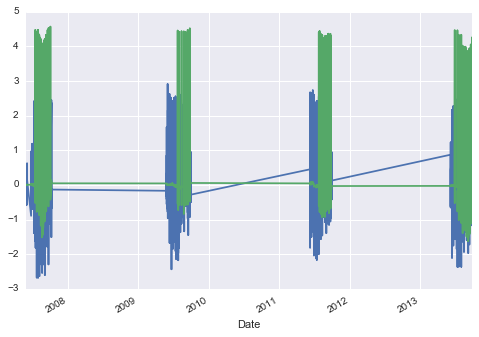

In [195]:
model2 = ARIMA(scaled_df.WnvPresent, order=(2, 1, 2), exog = scaled_df[arima_cols1]).fit()
model.resid.plot()
model2.resid.plot()

In [180]:
model.summary()
len_endog = len(scaled_df.WnvPresent)
len_endog

10506

TypeError: unsupported operand type(s) for +: 'slice' and 'int'

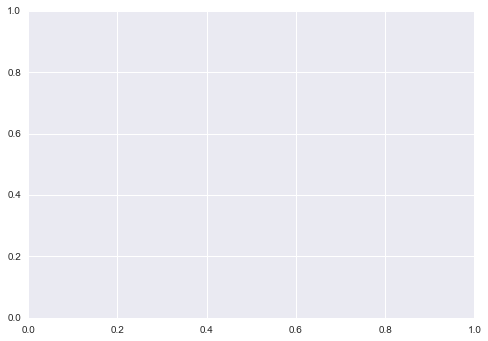

In [196]:
from statsmodels.tsa.arima_model import ARMA
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
model.plot_predict(200, 150)
plt.show()

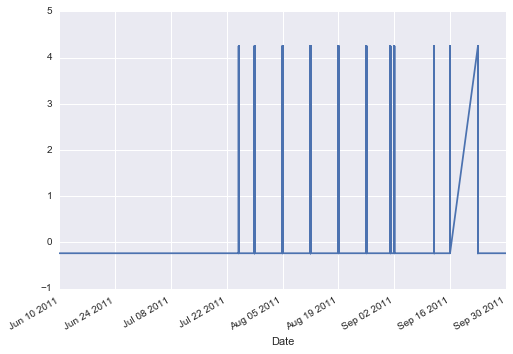

In [199]:
fig, ax = plt.subplots()
ax = scaled_df['2011'].WnvPresent.plot()

In [ ]:
model.fit().summary()

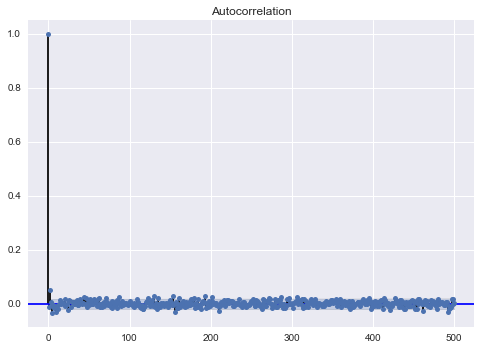

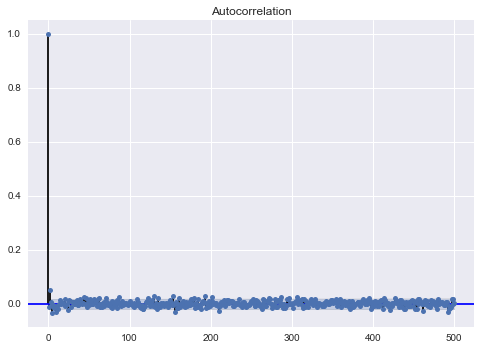

In [194]:
plot_acf(model.resid, lags=500)

In [197]:
scaled_df.head()

,Latitude,Longitude,NumMosquitos,WnvPresent,day,month,year,Tmax,Tmin,Tavg,...,trap_129,trap_130,trap_131,trap_132,trap_133,trap_134,trap_135,add_acc_5,add_acc_8,add_acc_9
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,1.007225,-1.047388,-0.734735,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,-0.887323,1.280507
2007-05-29,1.007225,-1.047388,-0.734735,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,-0.887323,1.280507
2007-05-29,1.364706,-0.718799,-0.734735,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,-0.887323,1.280507
2007-05-29,1.179300,-1.294214,-0.734735,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,1.126985,-0.780941
2007-05-29,1.179300,-1.294214,-0.548781,-0.235264,-2.164701,-2.522009,-1.094163,0.735332,-0.153231,0.331973,...,-0.069152,-0.077048,-0.056133,-0.016901,-0.025821,-0.277265,-0.116214,-0.455769,1.126985,-0.780941


In [200]:
location_clusters = pd.read_csv('https://raw.githubusercontent.com/cl65610/west_nile/master/assets/joined_pca.csv')

In [202]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
location_clusters.head()

,Unnamed: 0,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,day,...,DewPoint,PrecipTotal,Sunrise,Sunset,month_weather,day_weather,pca1,pca2,pca3,pca4
0,0,2007-05-29,2,1,41.954690,-87.800991,9,1,0,179,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
1,1,2007-05-29,3,1,41.954690,-87.800991,9,1,0,179,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
2,2,2007-05-29,3,6,41.994991,-87.769279,9,1,0,179,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
3,3,2007-05-29,2,13,41.974089,-87.824812,8,1,0,179,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123
4,4,2007-05-29,3,13,41.974089,-87.824812,8,4,0,179,...,58.5,0.0,421.0,1917.0,5.0,179.0,-0.663872,3.033573,-1.434144,1.092123


In [233]:
X = location_clusters[['Latitude', 'Longitude']]
dbscn = DBSCAN(eps = 0.03, min_samples = 5).fit(X)  
labels = dbscn.labels_

In [234]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8}